# **Day 1 : Project Setup & Dataset Understanding**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = '/content/drive/My Drive/Amazon Data Analysis/bestsellers with categories.csv'
df = pd.read_csv(file_path)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
print(df.info())
print(df.describe())
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None
       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

## **Day 2 : Data Cleaning**

In [ ]:
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [ ]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [ ]:
df = df.drop_duplicates()
print("After dropping duplicates:", df.shape)

After dropping duplicates: (550, 7)


In [ ]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
print("Updated column names:", df.columns.tolist())

Updated column names: ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


In [ ]:
df['price'] = df['price'].replace('[$,]', '', regex=True).astype(float)

In [ ]:
df.to_csv("/content/drive/My Drive/Amazon Data Analysis/cleaned_amazon_data.csv", index=False)

# **Day 3 : Exploratory Data Analysis (EDA)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/My Drive/Amazon Data Analysis/cleaned_amazon_data.csv')

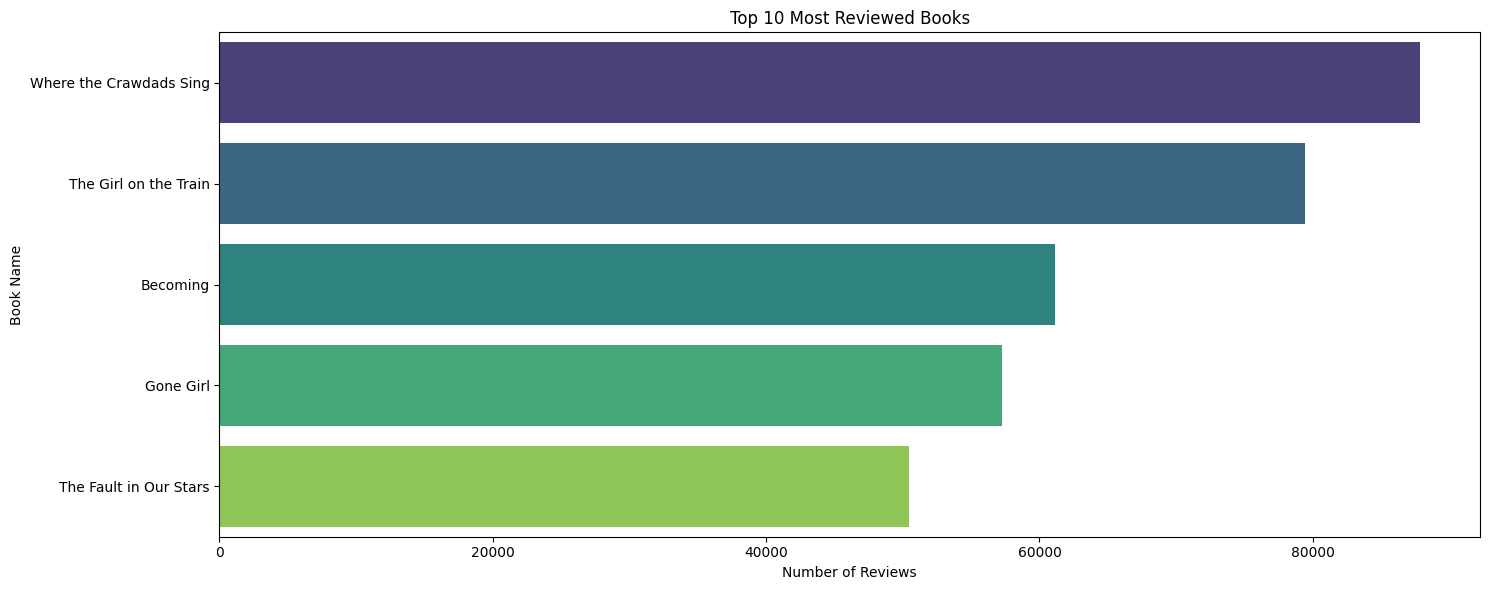

In [ ]:
top_books = df.sort_values(by='reviews', ascending=False).head(10)

plt.figure(figsize=(15,6))
sns.barplot(data=top_books, x='reviews', y='name', hue='name', palette='viridis', legend=False)
plt.title("Top 10 Most Reviewed Books")
plt.xlabel("Number of Reviews")
plt.ylabel("Book Name")
plt.tight_layout()
plt.show()

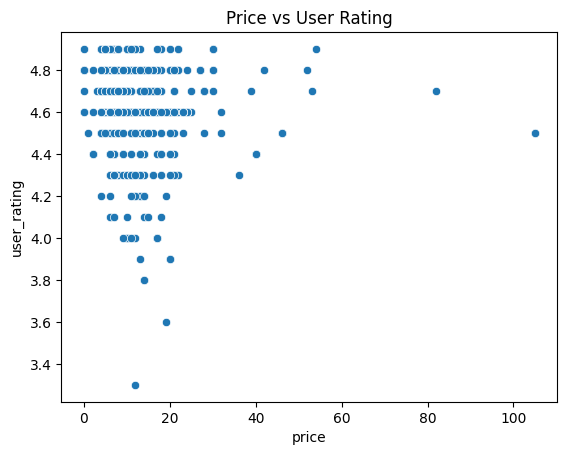

In [ ]:
sns.scatterplot(x='price', y='user_rating', data=df)
plt.title("Price vs User Rating")
plt.show()

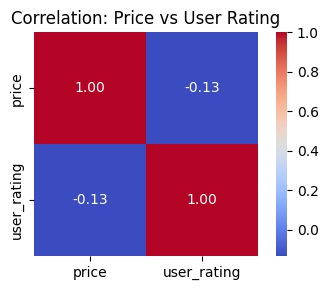

In [ ]:
subset = df[['price', 'user_rating']]

# Compute correlation matrix
corr_matrix = subset.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation: Price vs User Rating")
plt.tight_layout()
plt.show()



*   user_rating vs price -0.13 slight negative correlation ( higher priced books may have less rating)




# **Day 4 :Inventory  Analysis**

In [ ]:
import numpy as np
np.random.seed(42)
df['inventory'] = np.random.randint(10, 1000, size=len(df))
df['stock_turnover'] = df['reviews'] / df['inventory']
df['stock_status'] = df['inventory'].apply(
    lambda x: (
        'Understocked' if x < 100
        else ('Overstocked' if x > 700 else 'Healthy')
    )
)
df['stock_status'].value_counts()

,count
stock_status,
Healthy,336
Overstocked,171
Understocked,43


In [ ]:
def classify_risk(row):
    if row['stock_turnover'] < 0.5 and row['inventory'] > 700:
        return 'High Risk (Overstocked & Slow)'
    elif row['stock_turnover'] > 5 and row['inventory'] < 100:
        return 'High Risk (Stockout Risk)'
    else:
        return 'Low Risk or Normal'

df['inventory_risk'] = df.apply(classify_risk, axis=1)
df['inventory_risk'].value_counts()

,count
inventory_risk,
Low Risk or Normal,506
High Risk (Stockout Risk),43
High Risk (Overstocked & Slow),1


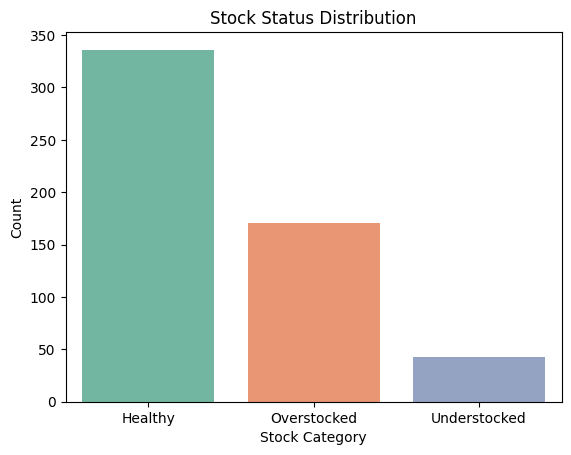

In [ ]:
sns.countplot(data=df, x='stock_status', palette='Set2', hue='stock_status')
plt.title('Stock Status Distribution')
plt.xlabel('Stock Category')
plt.ylabel('Count')
plt.show()

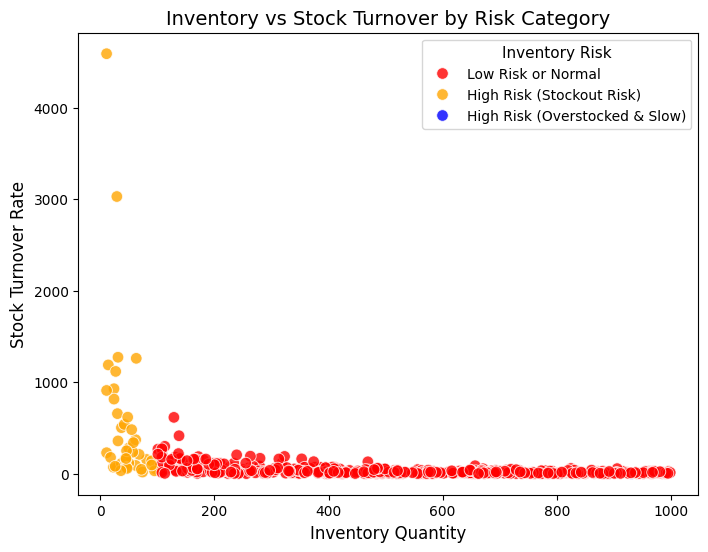

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
custom_palette = {
    'High Risk (Overstocked & Slow)': 'blue',
    'High Risk (Stockout Risk)': 'orange',
    'Low Risk or Normal': 'red'}
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df,x='inventory',y='stock_turnover',hue='inventory_risk',
                palette=custom_palette,s=70,alpha=0.8)
plt.title('Inventory vs Stock Turnover by Risk Category', fontsize=14)
plt.xlabel('Inventory Quantity', fontsize=12)
plt.ylabel('Stock Turnover Rate', fontsize=12)
plt.legend(title='Inventory Risk', fontsize=10, title_fontsize=11)
plt.show()

# **Day 5 : Predictive Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode Genre (categorical) into numbers
le = LabelEncoder()
df['genre_encoded'] = le.fit_transform(df['genre'])

# Feature columns
features=['reviews', 'user_rating', 'price', 'genre_encoded']

# Target column
target='stock_turnover'


In [ ]:
X=df[features]
y=df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R² Score:",r2)

Mean Squared Error: 16180.152389918063
R² Score: 0.009449664262557778


R² < 0.5: Weak model

The Mean Squared Error (MSE) of 16180.15 indicates a high average error between the predicted and actual stock turnover values, meaning the model's predictions are not very close to the true values.

The R² Score of 0.009 suggests that the model explains less than 1% of the variation in stock turnover, indicating that the linear regression model performs poorly and is not effective in capturing the underlying patterns in the data.


MSE of 16,180 is very high, meaning predictions are far off.

In [ ]:
predicted_df = X_test.copy()
predicted_df['Actual Turnover Rate'] = y_test
predicted_df['Predicted Turnover Rate'] = y_pred
predicted_df.head()

,reviews,user_rating,price,genre_encoded,Actual Turnover Rate,Predicted Turnover Rate
195,8393,4.6,17.0,1,11.160904,38.064096
79,15845,4.7,13.0,0,36.258581,126.471217
480,19546,4.9,5.0,0,27.568406,178.927746
109,13677,4.2,6.0,1,29.038217,70.919196
522,6108,4.8,4.0,1,11.166362,15.118125


The large difference between the Actual Turnover Rate and the Predicted Turnover Rate in our results suggests that our regression model might be underperforming

reviews, user_rating, price, and genre_encoded may not be enough to predict turnover.


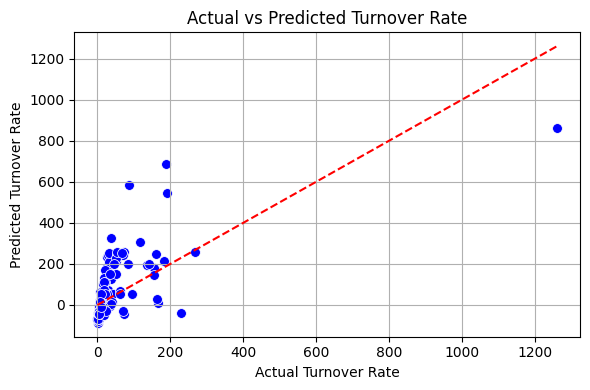

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, color='blue', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--')
plt.xlabel("Actual Turnover Rate")
plt.ylabel("Predicted Turnover Rate")
plt.title("Actual vs Predicted Turnover Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

This scatter plot visualizes the relationship between the actual and predicted stock turnover rates.

Each blue point represents a prediction; the closer it is to the red dashed line (which represents perfect prediction where actual = predicted), the more accurate the model is.

Since the points are scattered far from the line, it visually confirms that the model's predictions are not very accurate.

# **CONCLUSION**

A linear regression model was developed to predict the stock turnover rate using key features such as reviews, user rating, price, and genre.

 However, the model's performance was relatively poor, with an R² score of approximately 0.009, suggesting that these features do not sufficiently explain the variations in stock turnover.

 This indicates that the relationship is likely more complex and may depend on additional factors such as promotion strategies, seasonal trends, or actual sales data, which are not available in the current dataset.